# 03.1 Continuous-Time Processes
<h3><span style="color:#800000;"><strong>Authored by:</strong> <em>Alexandre Mathias DONNAT, Sr</em></span></h3>

**Goal of this notebook**

- Introduce continuous-time stochastic processes on a filtered probability space $(\Omega, \mathcal{F}, (\mathcal{F}_t)_{t \geq 0}, \mathbb{P})$ satisfying the usual conditions.
- Define filtrations, adapted processes, and stopping times in continuous time.
- Introduce the $\sigma$-algebra at a stopping time $\mathcal{F}_\tau$ and basic properties.
- Prove that hitting times of continuous adapted processes are stopping times.
- Illustrate these notions numerically with a discretised Brownian motion and a first-passage time.

**This notebook**

Provides the abstract continuous-time framework (filtrations, stopping times) that will be used throughout the Brownian motion, martingale, Itô integral and SDE notebooks.


# 1. Filtered probability space and processes

We fix a filtered probability space

$$(\Omega, \mathcal{F}, (\mathcal{F}_t)_{t \geq 0}, \mathbb{P})$$

with:

- $(\Omega, \mathcal{F}, \mathbb{P})$ a probability space,
- $(\mathcal{F}_t)_{t \geq 0}$ a non-decreasing family of sub-$\sigma$-algebras of $\mathcal{F}$,

by default, the filtration satisfies the usual conditions:

- **right-continuity**: $\mathcal{F}_t = \bigcap_{s > t} \mathcal{F}_s$,
- **completeness**: every $\mathbb{P}$-null set of $\mathcal{F}$ is contained in $\mathcal{F}_0$.

A stochastic process in continuous time is a family $(X_t)_{t \geq 0}$ of random variables

$$X_t : \Omega \to \mathbb{R}, \quad t \geq 0.$$

Equivalently, we can view $X$ as a mapping

$$X : [0, \infty) \times \Omega \to \mathbb{R}, \quad (t, \omega) \mapsto X_t(\omega).$$

For each fixed $\omega$, the map $t \mapsto X_t(\omega)$ is called a **sample path** (or **trajectory**).

In stochastic calculus, we often work with processes that are **càdlàg** (right-continuous with left limits) or **continuous**.


## 1.1 A simple càdlàg step process

We start from an i.i.d. sequence $(\xi_n)_{n \in \mathbb{N}}$ with values in $\{-1, +1\}$, and define a step process:

$$X_t = \xi_n \quad \text{for } t \in [n, n+1), \quad n = 0, 1, \ldots$$

This is a canonical example of a càdlàg process (piecewise constant with jumps at integer times).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.grid"] = True

def plot_path(t_grid, x, ax=None, label=None, **kwargs):
    """
    Simple helper to plot a 1D path X_t against time.
    """
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(t_grid, x, marker="o", linestyle="-", label=label, **kwargs)
    if label is not None:
        ax.legend()
    ax.set_xlabel("t")
    ax.set_ylabel("X_t")
    return ax

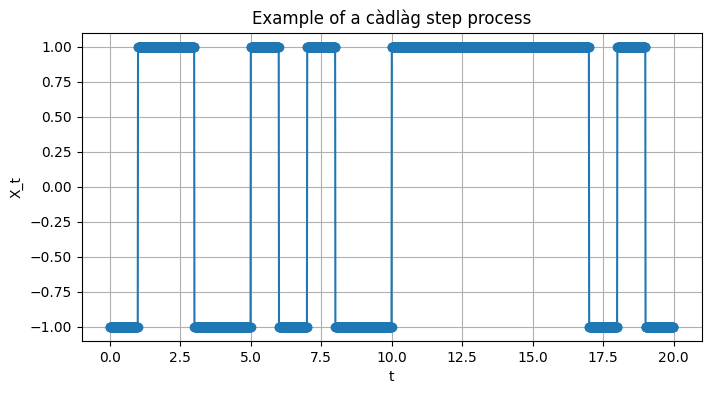

In [2]:
# Step process built from i.i.d. ±1 variables

N = 20
xi = rng.choice([-1, 1], size=N)

dt = 0.01
t_max = N
t_grid = np.arange(0, t_max, dt)

X_step = np.empty_like(t_grid, dtype=float)
for i, t in enumerate(t_grid):
    n = int(np.floor(t))
    if n >= N:
        n = N - 1
    X_step[i] = xi[n]

ax = plot_path(t_grid, X_step)
ax.set_title("Example of a càdlàg step process")
plt.show()

This simple object will be useful to illustrate filtrations and hitting times numerically.

# 2. Filtrations, adapted processes, stopping times

We now introduce the key objects: adapted processes, stopping times, and the σ-algebra at a stopping time.

## 2.1 Adapted processes

Let $(\Omega, \mathcal{F}, (\mathcal{F}_t)_{t\geq0}, \mathbb{P})$ be a filtered probability space as above.

A process $(X_t)_{t\geq0}$ is **adapted** to $(\mathcal{F}_t)$ if, for every $t\geq0$,

$$X_t \text{ is } \mathcal{F}_t\text{-measurable}.$$

**Intuitively**, this means that at time $t$, the value $X_t$ belongs to the information $\mathcal{F}_t$ available up to time $t$.
Adaptedness formalises the idea that the process does not anticipate future information.

## 2.2 Stopping times

A random time $\tau: \Omega \to [0, \infty]$ is called a **stopping time** with respect to the filtration $(\mathcal{F}_t)$ if

$$\\{\tau \leq t\\} \in \mathcal{F}_t, \quad \forall t\geq0.$$

**Interpretation**: at each time $t$, the event "the stopping time has already occurred" is observable with the information $\mathcal{F}_t$.

**Typical examples**:

- deterministic time $c\geq0$,
- a first hitting time of a level $a$ by a process $X$:

$$T_a = \inf\\{t\geq0: X_t \geq a\\}.$$

A standard **non-example** is the "last time before a fixed horizon $T$ at which $X$ hits a given level"; this generally depends on the future path and fails the stopping-time condition.

## 2.3 Sigma-algebra at a stopping time $\mathcal{F}_\tau$

Given a stopping time $\tau$, we define the σ-algebra at the stopping time $\mathcal{F}_\tau$ by

$$A \in \mathcal{F}_\tau \iff \forall t\geq0, \ A \cap \\{\tau \leq t\\} \in \mathcal{F}_t.$$

$\mathcal{F}_\tau$ contains exactly the events that are "observable at the moment where $\tau$ occurs", i.e. events for which it is possible, at time $\tau$, to decide whether they happen or not, using only past information.

## 2.4 Equivalent characterisations of stopping times

**Proposition 2.1.**
For a random time $\tau: \Omega \to [0, \infty]$, the following statements are equivalent:

1. $\\{\tau \leq t\\} \in \mathcal{F}_t$ for all $t \geq 0$.
2. $\\{\tau < t\\} \in \mathcal{F}_t$ for all $t \geq 0$.
3. $\\{\tau \geq t\\} \in \mathcal{F}_t$ for all $t \geq 0$.
4. $\\{\tau > t\\} \in \mathcal{F}_t$ for all $t \geq 0$.

**Idea of proof.**
Right-continuity of $(\mathcal{F}_t)$ allows us to approximate any time by rationals.
Property (1) implies (2) by countable union, and the remaining equivalences follow by complements.

A classical non-example of stopping time is a "last hitting time before a given horizon", which depends on future values of the process.


# 3. The sigma-algebra $\mathcal{F}_\tau$

For a stopping time $\tau$, the sigma-algebra at time $\tau$ is defined by

$$A \in \mathcal{F}_\tau \iff A \cap \{\tau \leq t\} \in \mathcal{F}_t \text{ for all } t \geq 0.$$

Fundamental structural properties:

- If $\sigma$ and $\tau$ are stopping times with $\sigma \leq \tau$ almost surely, then $\mathcal{F}_\sigma \subset \mathcal{F}_\tau$.

- If $X$ is adapted with càdlàg paths, then $X_\tau \mathbf{1}_{\{\tau < \infty\}}$ is $\mathcal{F}_\tau$-measurable.

- For any fixed $t \geq 0$, the stopped variable $X_{\tau \wedge t}$ is $\mathcal{F}_t$-measurable.

These facts ensure that stopped processes preserve measurability and will be used later when studying continuous-time martingales.


# 4. Hitting times of continuous processes

Let $(X_t)_{t \geq 0}$ be an adapted process with continuous sample paths.
For a level $a \in \mathbb{R}$, define the first hitting time

$$T_a = \inf\{t \geq 0 : X_t \geq a\}.$$

**Theorem 4.1.**
The hitting time $T_a$ is a stopping time.

**Short proof.**
For any $t \geq 0$,

$$\{T_a \leq t\} = \left\{\sup_{0 \leq s \leq t} X_s \geq a\right\}.$$

Continuity implies

$$\sup_{0 \leq s \leq t} X_s = \sup_{q \in \mathbb{Q} \cap [0,t]} X_q.$$

Each event $\{X_q \geq a\}$ is in $\mathcal{F}_q \subset \mathcal{F}_t$, and the supremum is taken over a countable set.
Hence $\{T_a \leq t\} \in \mathcal{F}_t$ for all $t$, proving that $T_a$ is a stopping time.


# 5. Numerical illustration with a discretised Brownian motion

We now illustrate the non-anticipative nature of a hitting time on a simple discretised Brownian motion.
We do not develop Brownian theory here; the full treatment is in 03.2_BrownianMotion.ipynb.

## 5.1 Simulating one Brownian path and a first passage time

We consider a standard Brownian motion $(W_t)_{t \in [0,T]}$, simulated on a grid, and define the discrete first passage time

$$T_a^{(\text{disc})} = \min\{t_k : W_{t_k} \geq a\}$$

on the discrete times $(t_k)$.


In [9]:
rng = np.random.default_rng(13)

T = 1.0
n = 1000
dt = T / n
t_bm = np.linspace(0.0, T, n + 1)

# Brownian increments (Euler exact for BM)
dW = rng.normal(0.0, np.sqrt(dt), size=n)
W = np.concatenate(([0.0], np.cumsum(dW)))

# Threshold and discrete hitting time
a = 1.0
indices_hit = np.where(W >= a)[0]
if indices_hit.size > 0:
    tau_idx = indices_hit[0]
    tau_disc = t_bm[tau_idx]
else:
    tau_idx = None
    tau_disc = np.inf

if tau_idx is not None:
    print(f"Discrete hitting time T_a^(disc) ≈ {tau_disc:.4f}")
else:
    print("Threshold a not reached on [0,T] in this path.")

Discrete hitting time T_a^(disc) ≈ 0.6510


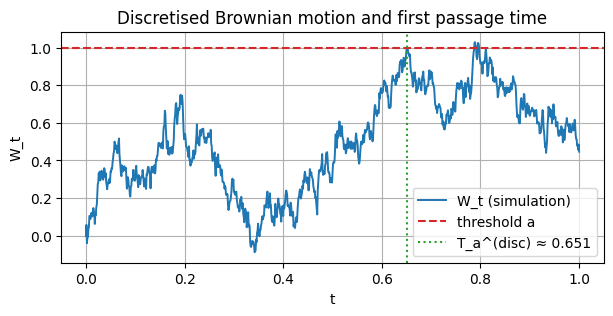

In [10]:
# Visualisation of the trajectory and first passage

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(t_bm, W, lw=1.4, label="W_t (simulation)")
ax.axhline(a, ls="--", color="tab:red", label="threshold a")

if tau_idx is not None:
    ax.axvline(t_bm[tau_idx], color="tab:green", ls=":", 
               label=f"T_a^(disc) ≈ {t_bm[tau_idx]:.3f}")

ax.set_title("Discretised Brownian motion and first passage time")
ax.set_xlabel("t")
ax.set_ylabel("W_t")
ax.legend()
plt.show()


## 5.2 Non-anticipative decision: knowing whether $T_a^{(\text{disc})} \leq t_k$

On the discrete grid, the stopping-time property becomes:

$$\{T_a^{(\text{disc})} \leq t_k\} = \{\exists j \leq k, \, W_{t_j} \geq a\}.$$

This event depends only on the values $(W_{t_j})_{j \leq k}$ observed up to time $t_k$, not on future values.


In [11]:
def has_hit_before_or_at_k(W, a, k):
    """
    Returns True if the discrete hitting time of the level a
    has occurred at or before index k, based only on W[:k+1].
    """
    return np.any(W[:k+1] >= a)

check_indices = [0, 5, 10, 50, 100, 200, 500, 800, 1000]
rows = []

for k in check_indices:
    value = has_hit_before_or_at_k(W, a, k)
    rows.append({"k": k, "t_k": t_bm[k], "1_{T_a<=t_k}": int(value)})

df_checks = pd.DataFrame(rows)
df_checks


,k,t_k,1_{T_a<=t_k}
0,0,0.000,0
1,5,0.005,0
2,10,0.010,0
3,50,0.050,0
4,100,0.100,0
5,200,0.200,0
6,500,0.500,0
7,800,0.800,1
8,1000,1.000,1


We observe that the indicator $\mathbb{1}_{\{T_a^{(\text{disc})} \leq t_k\}}$ remains equal to $0$ for all sampled times up to $t=0.5$, and becomes $1$ from $t=0.8$ onward.
Since the actual discrete hitting time is $\tau^{(\text{disc})} \approx 0.651$, this switch necessarily occurs between the sampled values $t=0.5$ and $t=0.8$.
This illustrates the stopping-time property in discrete time:

$$\{T_a^{(\text{disc})} \leq t_k\} = \{\exists j \leq k: W_{t_j} \geq a\},$$

and shows that the event becomes observable exactly from the first time the path crosses the level.
